### Import relavant library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# User Overview analysis

In [2]:
data = pd.read_csv('../data/data_source.csv', na_values=['?', None])
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
# column names
data.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

For better understanding of the columns, Exploring the data description [here](https://docs.google.com/spreadsheets/d/1wY7YZwyZ_r_8xMUe_N2ZQled4RjP0_T6/edit#gid=497912695) will help

## Data Exploration

In [4]:
## Check null values
data.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [5]:
data.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [6]:
data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


** Aggregate per user the following information in the column  
- number of xDR sessions
- Session duration
- the total download (DL) and upload (UL) data
- the total data volume (in Bytes) during this session for each application


### number of xDR session

In [7]:


data["MSISDN/Number"].apply(lambda x: '%.0f' % x).value_counts().head(11)[1:]

33626320676    18
33625779332    17
33614892860    17
33659725664    16
33675877202    15
33760536639    15
33667163239    13
33627080969    12
33604515716    12
33760413819    12
Name: MSISDN/Number, dtype: int64

### Session duration

In [8]:

data["Dur. (ms)"].describe()

count    1.500000e+05
mean     1.046086e+05
std      8.103762e+04
min      7.142000e+03
25%      5.744050e+04
50%      8.639900e+04
75%      1.324302e+05
max      1.859336e+06
Name: Dur. (ms), dtype: float64

In [9]:
sessions = data.groupby('MSISDN/Number')['Dur. (ms)'].sum()
sessions = pd.DataFrame(sessions)#.apply(lambda x: '%.0f' % x)
sessions["MSISDN/Number"] = sessions.index
sessions["MSISDN/Number"] =sessions["MSISDN/Number"].apply(lambda x: '%.0f' % x)
sessions = sessions.set_index("MSISDN/Number",drop=True)
sessions.sort_values(by='Dur. (ms)', ascending=False)

,Dur. (ms)
MSISDN/Number,
33625779332,18553754.0
33614892860,9966898.0
33760536639,9279434.0
33626320676,8791927.0
33667163239,8744914.0
...,...
33650431620,7267.0
33698390293,7258.0
33659328207,7189.0


In [10]:
sessions.sort_values(by='Dur. (ms)', ascending=False).head(10)


,Dur. (ms)
MSISDN/Number,
33625779332,18553754.0
33614892860,9966898.0
33760536639,9279434.0
33626320676,8791927.0
33667163239,8744914.0
33662840755,6614270.0
33664693736,6288730.0
33603127838,6287761.0
33667456716,5649882.0


In [63]:
top_sessions = sessions.sort_values(by='Dur. (ms)', ascending=False).head(10)

In [64]:
top_sessions 

,Dur. (ms)
MSISDN/Number,
33625779332,18553754.0
33614892860,9966898.0
33760536639,9279434.0
33626320676,8791927.0
33667163239,8744914.0
33662840755,6614270.0
33664693736,6288730.0
33603127838,6287761.0
33667456716,5649882.0


<Figure size 720x576 with 0 Axes>

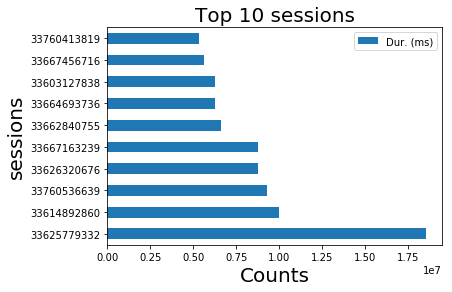

In [65]:
plt.figure(figsize=(10,8))
top_sessions.plot(kind="barh")
plt.title("Top 10 sessions", size = 20)
plt.xlabel("Counts", size = 20)
plt.ylabel("sessions", size = 20)
plt.show()

### the total download (DL) and upload (UL) data

In [11]:

data[['Total UL (Bytes)','Total DL (Bytes)']]

,Total UL (Bytes),Total DL (Bytes)
0,36749741.0,308879636.0
1,53800391.0,653384965.0
2,27883638.0,279807335.0
3,43324218.0,846028530.0
4,38542814.0,569138589.0
...,...,...
149996,57628851.0,574175259.0
149997,39135081.0,666648844.0
149998,34912224.0,592786405.0
149999,29626096.0,371895920.0


In [12]:
# total ul and dl per user or MSISDN/Number
upload_bytes = pd.DataFrame(data.groupby('MSISDN/Number')['Total UL (Bytes)'].sum())
downloads_bytes = pd.DataFrame(data.groupby('MSISDN/Number')['Total DL (Bytes)'].sum())
# downloads_bytes = downloads_bytes.set_index("MSISDN/Number",drop=True)


In [13]:
upload_bytes.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 106856 entries, 33601001722.0 to 882397108489451.0
Data columns (total 1 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Total UL (Bytes)  106856 non-null  float64
dtypes: float64(1)
memory usage: 1.6 MB


In [14]:
upload_bytes
upload_bytes["MSISDN/Number"] = upload_bytes.index
upload_bytes["MSISDN/Number"] =upload_bytes["MSISDN/Number"].apply(lambda x: '%.0f' % x)
upload_bytes = upload_bytes.set_index("MSISDN/Number",drop=True)
upload_bytes

,Total UL (Bytes)
MSISDN/Number,
33601001722,36053108.0
33601001754,36104459.0
33601002511,39306820.0
33601007832,20327526.0
33601008617,94280527.0
...,...
33789996170,26716429.0
33789997247,35732243.0
3197020876596,37295915.0


In [15]:

downloads_bytes["MSISDN/Number"] = downloads_bytes.index
downloads_bytes["MSISDN/Number"] = downloads_bytes["MSISDN/Number"].apply(lambda x: '%.0f' % x)
downloads_bytes["Total DL (Bytes)"] = downloads_bytes["Total DL (Bytes)"].apply(lambda x: '%.0f' % x)
downloads_bytes = downloads_bytes.set_index("MSISDN/Number",drop=True)
downloads_bytes

,Total DL (Bytes)
MSISDN/Number,
33601001722,842637466
33601001754,120755184
33601002511,556659663
33601007832,401993172
33601008617,1363130417
...,...
33789996170,687925212
33789997247,444575092
3197020876596,194828056


### the total data volume (in Bytes) during this session for each application

In [16]:
volumes = data.groupby('MSISDN/Number').agg({'Social Media DL (Bytes)':"sum",
 'Social Media UL (Bytes)':"sum",
 'Google DL (Bytes)':"sum",
 'Google UL (Bytes)':"sum",
 'Email DL (Bytes)':"sum",
 'Email UL (Bytes)':"sum",
 'Youtube DL (Bytes)':"sum",
 'Youtube UL (Bytes)':"sum",
 'Netflix DL (Bytes)':"sum",
 'Netflix UL (Bytes)':"sum",
 'Gaming DL (Bytes)':"sum",
 'Gaming UL (Bytes)':"sum",
 'Other DL (Bytes)':"sum",
 'Other UL (Bytes)':"sum",
 'Total UL (Bytes)':"sum",
 'Total DL (Bytes)':"sum"})

In [17]:

volumes["index"] = volumes.index
volumes["index"] = volumes["index"].apply(lambda x: '%.0f' % x)
volumes = volumes.set_index("index",drop=True)
volumes

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
index,,,,,,,,,,,,,,,,
33601001722,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0,36053108.0,8.426375e+08
33601001754,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0,36104459.0,1.207552e+08
33601002511,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0,39306820.0,5.566597e+08
33601007832,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0,20327526.0,4.019932e+08
33601008617,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0,94280527.0,1.363130e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33789996170,234320.0,65863.0,6834178.0,697091.0,480946.0,525969.0,8294310.0,18353533.0,14754741.0,147797.0,6.573267e+08,3034642.0,291391283.0,3891534.0,26716429.0,6.879252e+08
33789997247,442214.0,56355.0,1472406.0,3957299.0,2513433.0,664.0,5596862.0,14254710.0,6929961.0,1601099.0,4.276202e+08,9383076.0,204636073.0,6479040.0,35732243.0,4.445751e+08
3197020876596,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,1.645636e+08,13485133.0,467678100.0,2848373.0,37295915.0,1.948281e+08


In [18]:
volumes.describe()

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.068560e+05,106856.000000,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05
mean,2.502081e+06,45886.012802,8.016496e+06,2.865938e+06,2.497352e+06,6.514435e+05,1.621461e+07,1.534379e+07,1.620639e+07,1.533194e+07,5.882158e+08,1.155326e+07,5.869916e+08,1.151716e+07,5.730942e+07,6.336527e+08
std,1.887588e+06,34717.044775,6.065160e+06,2.172787e+06,1.897063e+06,4.948601e+05,1.232294e+07,1.159870e+07,1.231717e+07,1.161060e+07,4.440290e+08,8.731469e+06,4.437790e+08,8.706879e+06,3.565765e+07,4.645551e+08
min,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,9.700000e+01,1.400000e+01,5.300000e+01,1.060000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.560000e+02,2.866892e+06,8.827082e+06
25%,1.175902e+06,21600.750000,3.802894e+06,1.341100e+06,1.184544e+06,3.065678e+05,7.647143e+06,7.246758e+06,7.593534e+06,7.206775e+06,2.793230e+08,5.445849e+06,2.767785e+08,5.461189e+06,3.639547e+07,3.148271e+08
50%,2.265000e+06,41559.500000,7.256742e+06,2.593314e+06,2.266259e+06,5.872975e+05,1.460547e+07,1.386731e+07,1.463991e+07,1.387814e+07,5.325190e+08,1.044654e+07,5.299489e+08,1.037673e+07,4.679387e+07,5.703677e+08
75%,3.267238e+06,59919.250000,1.043106e+07,3.743934e+06,3.250651e+06,8.525612e+05,2.112900e+07,1.997808e+07,2.113463e+07,2.000853e+07,7.669561e+08,1.508080e+07,7.653643e+08,1.502752e+07,6.573199e+07,8.073645e+08
max,4.274384e+07,630942.000000,1.161065e+08,3.608540e+07,3.360721e+07,9.013997e+06,2.378830e+08,2.150757e+08,1.994792e+08,2.032419e+08,7.622035e+09,1.547897e+08,8.025477e+09,1.529305e+08,7.295774e+08,8.156743e+09


In [46]:
handset_types = data["Handset Type"].value_counts()
handset_types.head()

Huawei B528S-23A           19752
Apple iPhone 6S (A1688)     9419
Apple iPhone 6 (A1586)      9023
undefined                   8987
Apple iPhone 7 (A1778)      6326
Name: Handset Type, dtype: int64

In [50]:
# Top 10 handset types
top_handset_types = handset_types.sort_values( ascending=False).head(10)

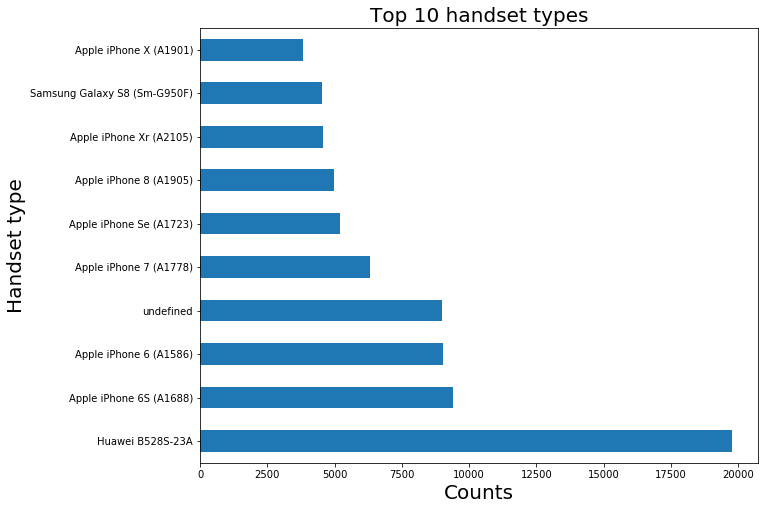

In [57]:
plt.figure(figsize=(10,8))
top_handset_types.plot(kind="barh")
plt.title("Top 10 handset types", size = 20)
plt.xlabel("Counts", size = 20)
plt.ylabel("Handset type", size = 20)
plt.show()

In [60]:
handset_manufacturer = data["Handset Manufacturer"].value_counts()
handset_manufacturer.head()

Apple                            59565
Samsung                          40839
Huawei                           34423
undefined                         8987
Sony Mobile Communications Ab      980
Name: Handset Manufacturer, dtype: int64

In [61]:
# Top 10 handset types
top_handset_manufacturer = handset_manufacturer.sort_values( ascending=False).head(10)

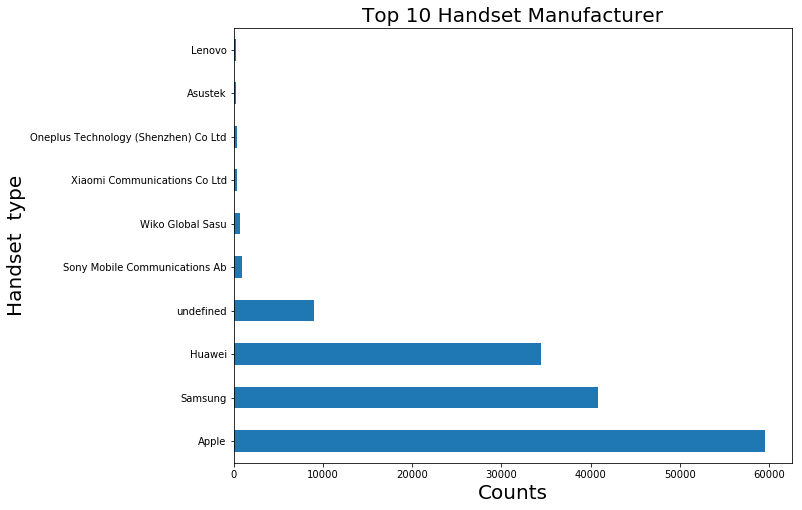

In [62]:
plt.figure(figsize=(10,8))
top_handset_manufacturer.plot(kind="barh")
plt.title("Top 10 Handset Manufacturer", size = 20)
plt.xlabel("Counts", size = 20)
plt.ylabel("Handset  type", size = 20)
plt.show()

## exploratory data analysis

In [20]:
## Check null values
data.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [22]:
# # drop columns with more than 30% missing values
df_clean = data.drop(['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 
                    'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL',
                    'Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B',
                    'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL',
                    'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B'], axis=1)
df_clean.shape

(150001, 45)

In [26]:
# fill missing with ffill method for columns (diag_1, diag_2, diag_3)

def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]


def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

In [39]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Telecom dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")



In [23]:
## Check null values
df_clean.isna().sum()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [214]:
percent_missing(df_clean)

The Telecom dataset contains 1.02 % missing values.


In [322]:
# Let's remove missing MSISDN/Number
df_clean_customers = df_clean[~df_clean['MSISDN/Number'].isna()]
df_clean_bearer = df_clean_customers[~df_clean_customers['Bearer Id'].isna()]

In [323]:
percent_missing(df_clean_bearer)

The Telecom dataset contains 0.94 % missing values.


In [278]:
df_clean_customers.isna().sum()

Bearer Id                           429
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                         0
IMEI                                  0
Last Location Name                  589
Avg RTT DL (ms)                   27644
Avg RTT UL (ms)                   27625
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 720
50 Kbps < DL TP < 250 Kbps (%)      720
250 Kbps < DL TP < 1 Mbps (%)       720
DL TP > 1 Mbps (%)                  720
UL TP < 10 Kbps (%)                 767
10 Kbps < UL TP < 50 Kbps (%)       767
50 Kbps < UL TP < 300 Kbps (%)      767
UL TP > 300 Kbps (%)                767
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


In [279]:
def map_df(function, df,columns):
    for col in columns:
        df[col] = function(df, col)
    return df

In [280]:
def fill_mode(df,col):
    df[col]=df[col].fillna(df[col].mode()[0])

In [281]:
df_clean_bearer.isna().sum()

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                         0
IMEI                                  0
Last Location Name                  160
Avg RTT DL (ms)                   27636
Avg RTT UL (ms)                   27616
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 712
50 Kbps < DL TP < 250 Kbps (%)      712
250 Kbps < DL TP < 1 Mbps (%)       712
DL TP > 1 Mbps (%)                  712
UL TP < 10 Kbps (%)                 767
10 Kbps < UL TP < 50 Kbps (%)       767
50 Kbps < UL TP < 300 Kbps (%)      767
UL TP > 300 Kbps (%)                767
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


In [324]:
df_clean_bearer.shape
percent_missing(df_clean_bearer)

The Telecom dataset contains 0.94 % missing values.


In [288]:
df_clean_bearer._get_numeric_data().columns

Index(['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number',
       'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Total UL (Bytes)', 'Total DL (Bytes)'],
      dtyp

In [342]:
## handle missing values
df_clean_nan = df_clean_bearer.copy(deep=True)


In [345]:
for col in  ["Avg RTT DL (ms)","Avg RTT UL (ms)","DL TP < 50 Kbps (%)",
                                                         "50 Kbps < DL TP < 250 Kbps (%)","250 Kbps < DL TP < 1 Mbps (%)",
                                                         "DL TP > 1 Mbps (%)",
                                                          "UL TP < 10 Kbps (%)",
                                                          "10 Kbps < UL TP < 50 Kbps (%)",
                                                          "50 Kbps < UL TP < 300 Kbps (%)",
                                                          "UL TP > 300 Kbps (%)",
                                                          "Nb of sec with Vol DL < 6250B","Nb of sec with Vol UL < 1250B"]:
    df_clean_nan1[col]=df_clean_nan1[col].fillna(df_clean_nan1[col].mode()[0])

In [346]:
df_clean_nan.shape

(148506, 45)

In [347]:
df_clean_nan

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,...,"15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,...,"20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,...,"19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,...,"21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,...,"15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,"13,042,425,979,329,300,480.00",4/29/2019 7:28,615.00,4/30/2019 0:01,407.00,"59,587.00","208,201,402,604,057.00","33,668,648,496.00","35,332,510,508,318.00",T85721A,...,"6,550,499.00","18,003,146.00","22,468,983.00","7,149,728.00","784,435,351.00","12,724,751.00","321,383,162.00","14,890,486.00","53,745,392.00","819,016,468.00"
149996,"7,277,825,670,196,679,680.00",4/29/2019 7:28,451.00,4/30/2019 6:02,214.00,"81,230.00","208,202,201,200,072.00","33,650,688,697.00","35,483,109,451,938.00",D20434A,...,"16,191,667.00","11,763,428.00","17,883,703.00","19,678,161.00","526,609,673.00","9,197,207.00","3,264,510.00","13,487,416.00","57,628,851.00","574,175,259.00"
149997,"7,349,883,264,234,609,664.00",4/29/2019 7:28,483.00,4/30/2019 10:41,187.00,"97,970.00","208,201,908,153,249.00","33,663,449,963.00","35,660,508,296,467.00",D10223C,...,"13,877,234.00","8,288,284.00","19,350,146.00","21,293,148.00","626,893,062.00","4,735,033.00","712,180,387.00","2,457,758.00","39,135,081.00","666,648,844.00"
149998,"13,114,483,573,367,300,096.00",4/29/2019 7:28,283.00,4/30/2019 10:46,810.00,"98,249.00","208,201,711,161,187.00","33,621,890,103.00","35,721,209,870,907.00",T51102A,...,"22,660,510.00","1,855,903.00","9,963,942.00","5,065,760.00","553,539,484.00","13,394,316.00","121,100,856.00","11,314,729.00","34,912,224.00","592,786,405.00"


In [348]:
## handle missing values
df_clean = map_df(fix_missing_ffill,df_clean_nan1, ["Last Location Name"])

In [349]:
percent_missing(df_clean)

The Telecom dataset contains 0.0 % missing values.


### Describe all  relevant variables and associated data types (slide). 


In [351]:
data = df_clean

In [352]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148506 entries, 0 to 149999
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       148506 non-null  float64
 1   Start                           148506 non-null  object 
 2   Start ms                        148506 non-null  float64
 3   End                             148506 non-null  object 
 4   End ms                          148506 non-null  float64
 5   Dur. (ms)                       148506 non-null  float64
 6   IMSI                            148506 non-null  float64
 7   MSISDN/Number                   148506 non-null  float64
 8   IMEI                            148506 non-null  float64
 9   Last Location Name              148506 non-null  object 
 10  Avg RTT DL (ms)                 148506 non-null  float64
 11  Avg RTT UL (ms)                 148506 non-null  float64
 12  Avg Bearer TP DL

In [353]:
numerical_data = df_clean._get_numeric_data()

In [363]:
import plotly.express as px
fig = px.imshow(numerical_data.corr())
fig.show()


In [364]:
cor_matrix = numerical_data.corr().abs()
cor_matrix

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
Bearer Id,1.00,0.00,0.00,0.01,0.00,0.00,0.16,0.02,0.03,0.07,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Start ms,0.00,1.00,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
End ms,0.00,0.12,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Dur. (ms),0.01,0.00,0.00,1.00,0.03,0.02,0.06,0.05,0.02,0.17,...,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00
IMSI,0.00,0.00,0.00,0.03,1.00,0.66,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01
MSISDN/Number,0.00,0.00,0.00,0.02,0.66,1.00,0.01,0.00,0.00,0.00,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00
IMEI,0.16,0.00,0.00,0.06,0.01,0.01,1.00,0.01,0.14,0.30,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Avg RTT DL (ms),0.02,0.00,0.00,0.05,0.00,0.00,0.01,1.00,0.01,0.00,...,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00
Avg RTT UL (ms),0.03,0.00,0.00,0.02,0.00,0.00,0.14,0.01,1.00,0.07,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Avg Bearer TP DL (kbps),0.07,0.00,0.00,0.17,0.00,0.00,0.30,0.00,0.07,1.00,...,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00


In [365]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
upper_tri

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
Bearer Id,nan,0.00,0.00,0.01,0.00,0.00,0.16,0.02,0.03,0.07,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Start ms,nan,nan,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
End ms,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Dur. (ms),nan,nan,nan,nan,0.03,0.02,0.06,0.05,0.02,0.17,...,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00
IMSI,nan,nan,nan,nan,nan,0.66,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01
MSISDN/Number,nan,nan,nan,nan,nan,nan,0.01,0.00,0.00,0.00,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00
IMEI,nan,nan,nan,nan,nan,nan,nan,0.01,0.14,0.30,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Avg RTT DL (ms),nan,nan,nan,nan,nan,nan,nan,nan,0.01,0.00,...,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00
Avg RTT UL (ms),nan,nan,nan,nan,nan,nan,nan,nan,nan,0.07,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Avg Bearer TP DL (kbps),nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00


In [366]:
 to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
to_drop

['MSISDN/Number',
 'Avg Bearer TP UL (kbps)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Total UL (Bytes)',
 'Total DL (Bytes)']

In [367]:
numerical_data['Avg Bearer TP UL (kbps)']

0           44.00
1           26.00
2            9.00
3           44.00
4            9.00
           ...   
149995   1,393.00
149996      65.00
149997      54.00
149998      47.00
149999      37.00
Name: Avg Bearer TP UL (kbps), Length: 148506, dtype: float64

In [368]:
cor_matrixB = numerical_data[['MSISDN/Number',
 'Avg Bearer TP UL (kbps)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Total UL (Bytes)',
 'Total DL (Bytes)']].corr().abs()
cor_matrixB

,MSISDN/Number,Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Total UL (Bytes),Total DL (Bytes)
MSISDN/Number,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00
Avg Bearer TP UL (kbps),0.00,1.00,0.40,0.31,0.31,0.33,0.23,0.14,0.37,0.11,0.40,0.41,0.00,0.00
DL TP < 50 Kbps (%),0.00,0.40,1.00,0.84,0.87,0.73,0.32,0.11,0.39,0.20,0.35,0.48,0.00,0.00
50 Kbps < DL TP < 250 Kbps (%),0.00,0.31,0.84,1.00,0.63,0.33,0.25,0.09,0.27,0.19,0.24,0.32,0.00,0.00
250 Kbps < DL TP < 1 Mbps (%),0.00,0.31,0.87,0.63,1.00,0.56,0.20,0.08,0.32,0.15,0.29,0.41,0.00,0.00
DL TP > 1 Mbps (%),0.00,0.33,0.73,0.33,0.56,1.00,0.32,0.09,0.35,0.10,0.31,0.43,0.00,0.00
10 Kbps < UL TP < 50 Kbps (%),0.00,0.23,0.32,0.25,0.20,0.32,1.00,0.24,0.29,0.08,0.20,0.17,0.01,0.00
50 Kbps < UL TP < 300 Kbps (%),0.00,0.14,0.11,0.09,0.08,0.09,0.24,1.00,0.21,0.03,0.13,0.07,0.00,0.00
Activity Duration UL (ms),0.00,0.37,0.39,0.27,0.32,0.35,0.29,0.21,1.00,0.07,0.75,0.77,0.00,0.00
Dur. (ms).1,0.02,0.11,0.20,0.19,0.15,0.10,0.08,0.03,0.07,1.00,0.06,0.07,0.00,0.00


### Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.


In [369]:
data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,"148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00",...,"148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00"
mean,"10,146,757,650,164,756,480.00",499.21,498.64,"105,084.05","208,201,599,922,260.41","41,906,541,782.21","48,500,684,616,792.02",91.65,15.28,"13,287.52",...,"11,633,868.43","11,008,567.70","11,627,241.74","11,001,902.34","422,064,222.70","8,289,599.59","421,152,465.36","8,262,685.05","41,119,372.80","454,664,032.00"
std,"2,893,261,633,271,228,928.00",288.56,288.07,"81,072.74","15,243,472,825.67","2,450,975,846,357.30","22,432,166,298,203.47",530.51,76.63,"23,993.48",...,"6,711,236.45","6,345,625.17","6,724,993.74","6,357,929.85","244,004,290.26","4,781,966.86","243,163,937.39","4,768,806.07","11,278,441.20","244,179,073.24"
min,"6,917,537,518,543,529,984.00",0.00,0.00,"7,142.00","204,047,108,489,451.00","33,601,001,722.00","440,015,202,000.00",0.00,0.00,0.00,...,53.00,105.00,42.00,35.00,"2,516.00",59.00,"3,290.00",148.00,"2,866,892.00","7,114,041.00"
25%,"7,349,883,247,462,785,024.00",250.00,251.00,"58,248.75","208,201,401,264,008.00","33,651,311,444.25","35,460,708,962,514.00",28.00,3.00,43.00,...,"5,833,290.25","5,515,832.00","5,778,898.50","5,476,773.75","210,476,489.00","4,130,680.00","210,304,184.50","4,144,178.75","33,218,278.00","243,126,304.25"
50%,"7,349,883,264,172,940,288.00",499.00,500.00,"86,399.00","208,201,546,332,650.50","33,663,708,556.00","35,722,309,017,450.00",38.00,5.00,63.00,...,"11,615,961.50","11,012,318.00","11,642,380.00","10,999,370.50","423,466,906.50","8,291,649.50","421,861,759.00","8,266,016.00","41,141,959.50","455,940,800.50"
75%,"13,042,425,978,973,900,800.00",749.00,749.00,"132,932.75","208,201,771,619,073.25","33,683,515,176.75","86,119,704,824,101.00",62.00,11.00,"19,699.50",...,"17,446,392.25","16,514,556.25","17,470,916.50","16,502,847.75","633,274,979.00","12,432,259.75","631,633,770.00","12,380,494.00","49,032,524.00","665,754,159.25"
max,"13,186,541,167,134,199,808.00",999.00,999.00,"1,859,336.00","208,252,167,239,575.00","882,397,108,489,451.00","99,001,201,327,774.00","96,923.00","7,120.00","378,160.00",...,"23,259,098.00","22,011,962.00","23,259,189.00","22,011,955.00","843,441,889.00","16,558,794.00","843,442,489.00","16,558,816.00","78,331,311.00","902,969,616.00"


### Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation. 


## Utility Functions

In [370]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]


###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


pd.options.display.float_format = format_float

### Conduct a Graphical Univariate Analysis 
by identifying the most suitable plotting options for each variable and interpret your findings.



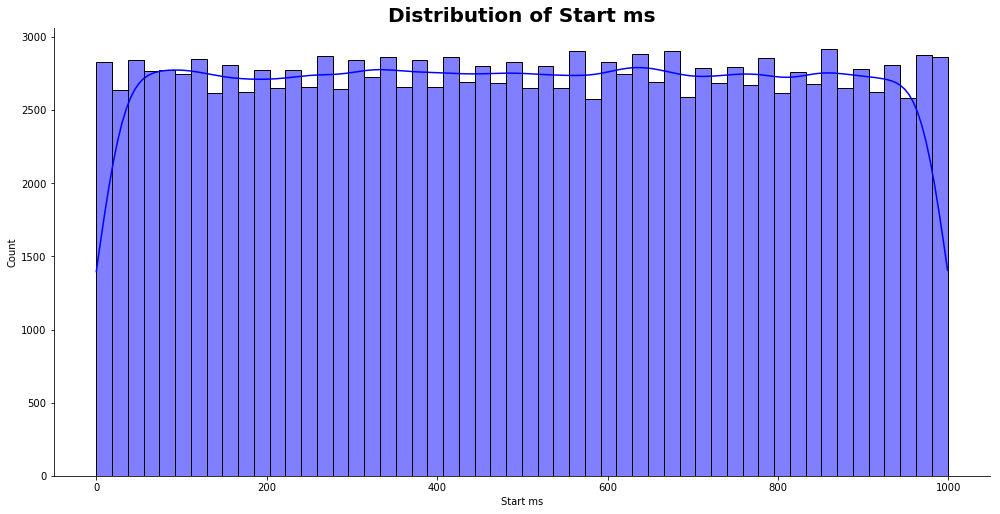

In [371]:
plot_hist(numerical_data, "Start ms", "blue")

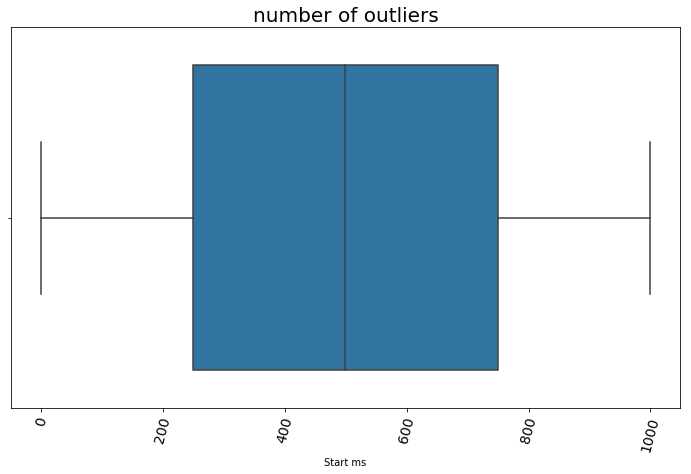

In [372]:
plot_box(numerical_data, "Start ms", "number of outliers")

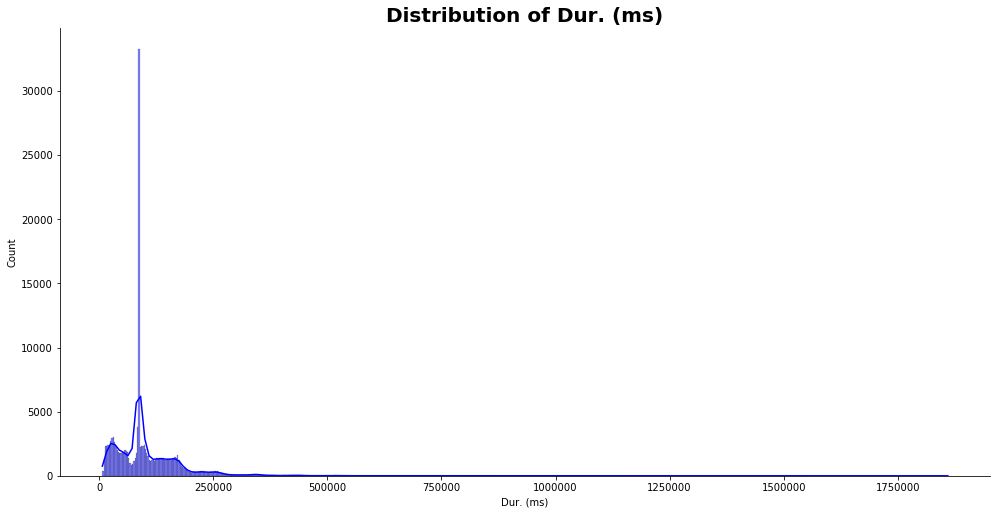

In [87]:
plot_hist(numerical_data, 'Dur. (ms)',  "blue")

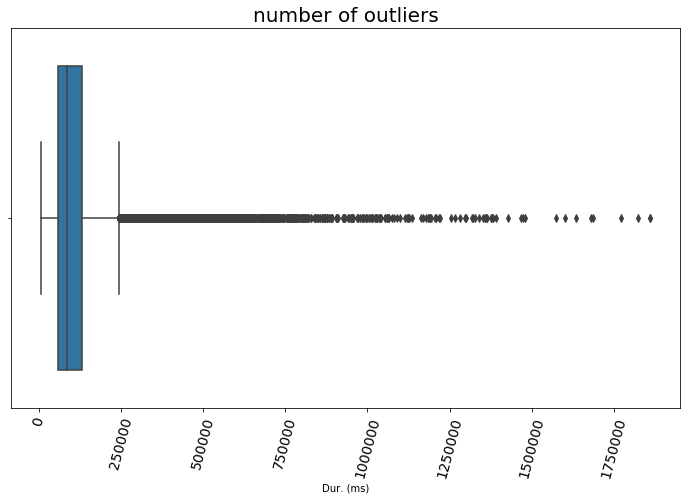

In [123]:
plot_box(numerical_data, 'Dur. (ms)', "number of outliers")

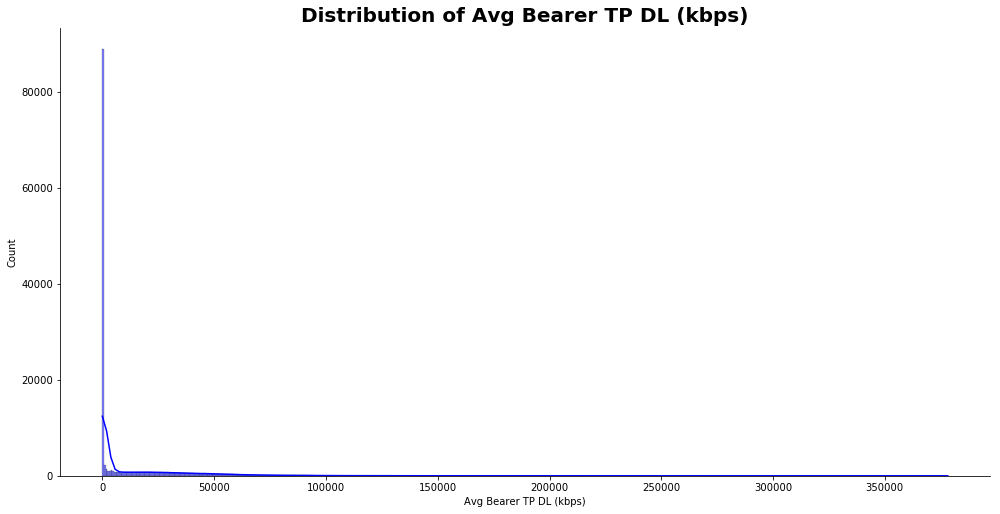

In [373]:
plot_hist(numerical_data, 'Avg Bearer TP DL (kbps)',  "blue")

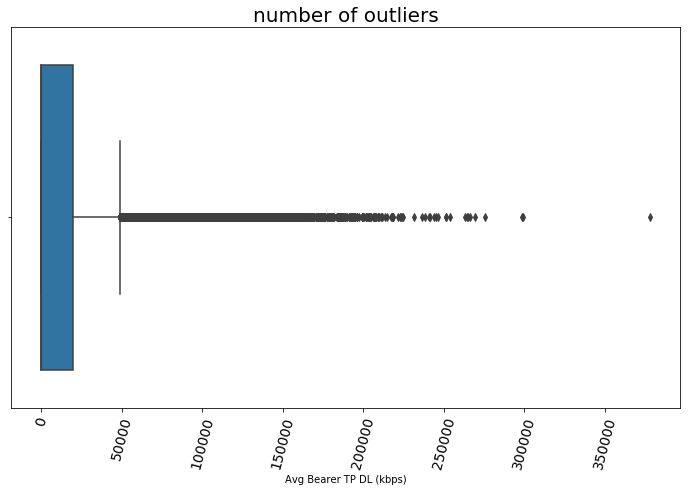

In [374]:
plot_box(numerical_data, 'Avg Bearer TP DL (kbps)',  "number of outliers")

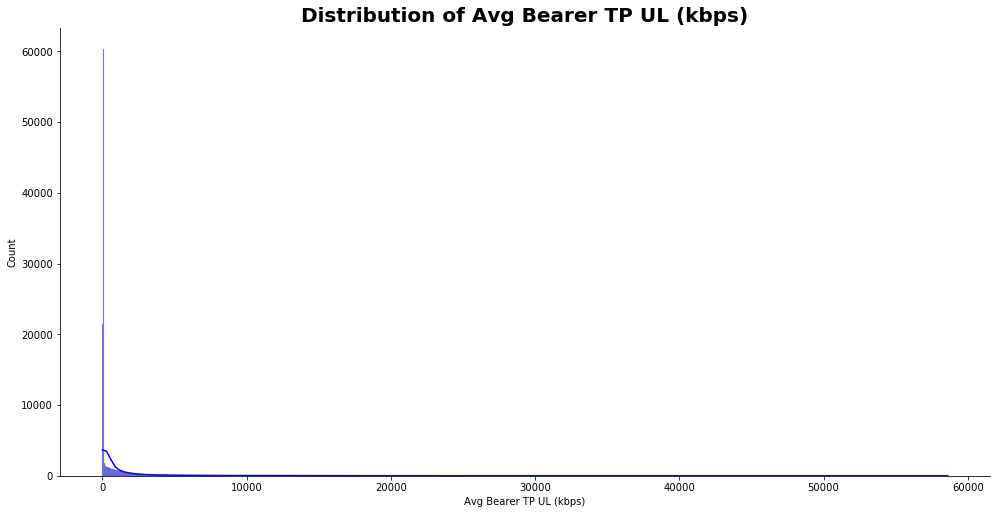

In [375]:
plot_hist(numerical_data, 'Avg Bearer TP UL (kbps)', "blue")

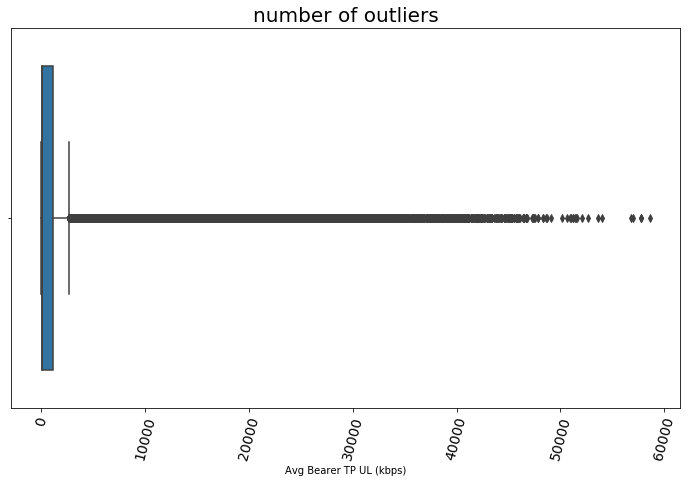

In [376]:
plot_box(numerical_data, 'Avg Bearer TP UL (kbps)', "number of outliers")

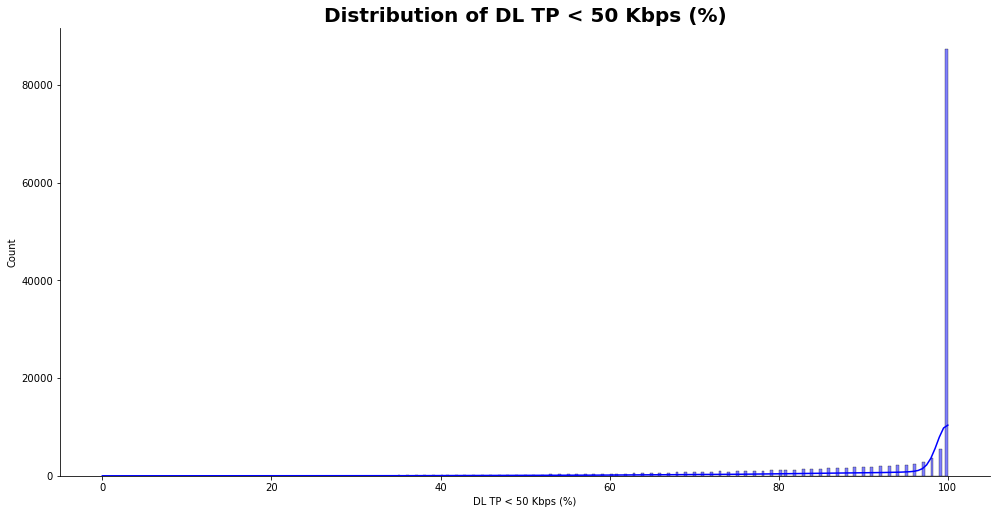

In [377]:
plot_hist(numerical_data, 'DL TP < 50 Kbps (%)', "blue")

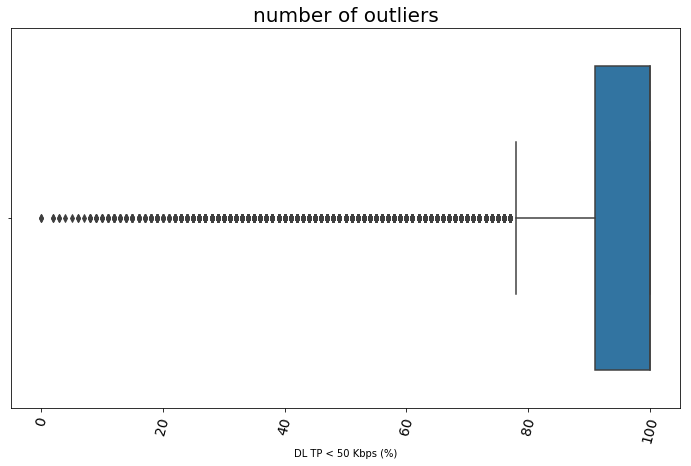

In [127]:
plot_box(numerical_data, 'DL TP < 50 Kbps (%)', "number of outliers")

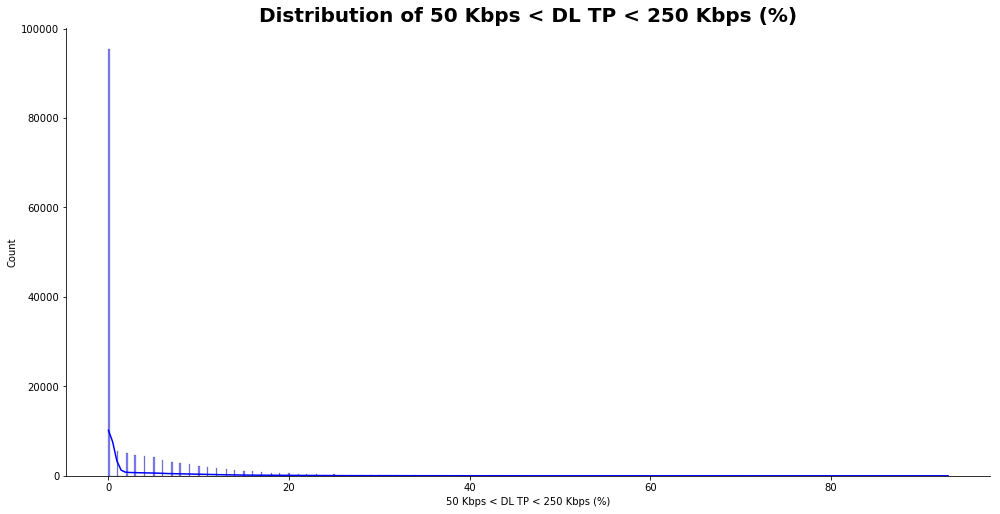

In [379]:
plot_hist(numerical_data,'50 Kbps < DL TP < 250 Kbps (%)',"blue")

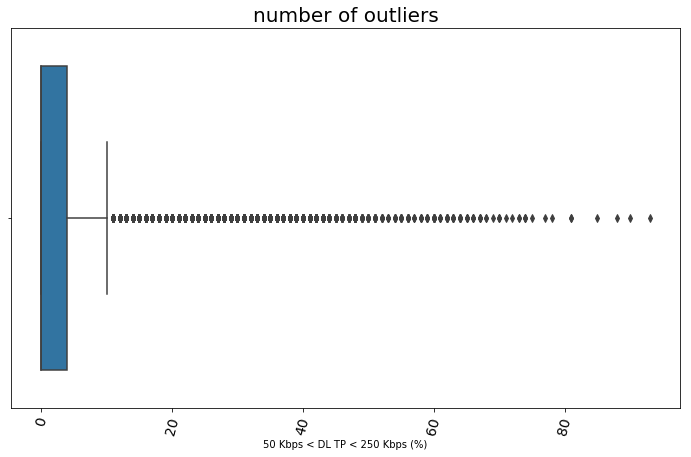

In [380]:
plot_box(numerical_data,'50 Kbps < DL TP < 250 Kbps (%)',"number of outliers")

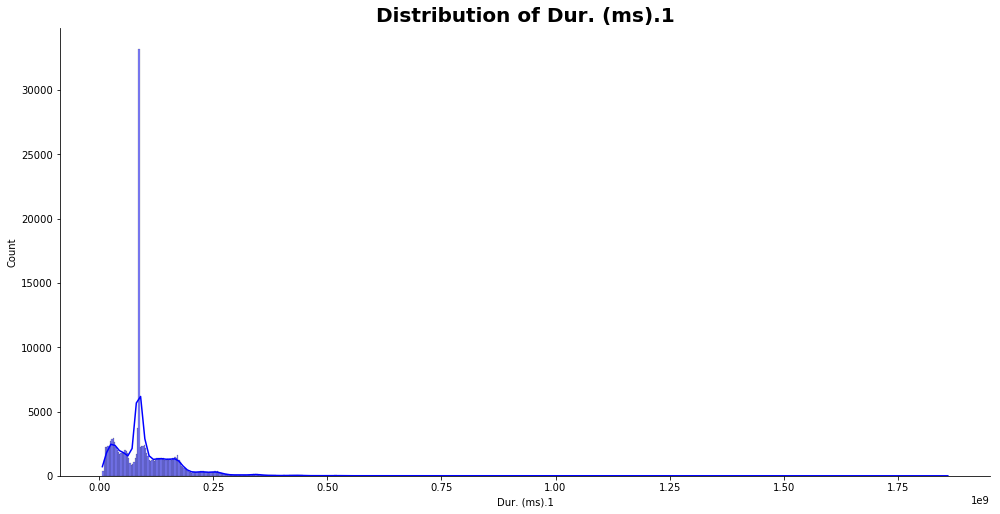

In [381]:
plot_hist(numerical_data, 'Dur. (ms).1',"blue")

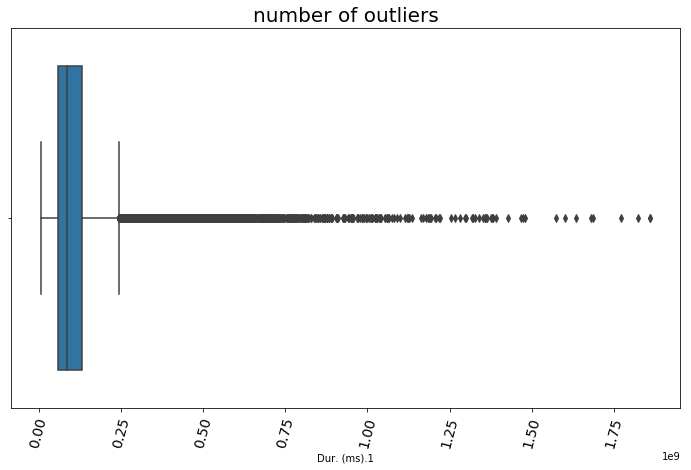

In [382]:
plot_box(numerical_data, 'Dur. (ms).1',"number of outliers")

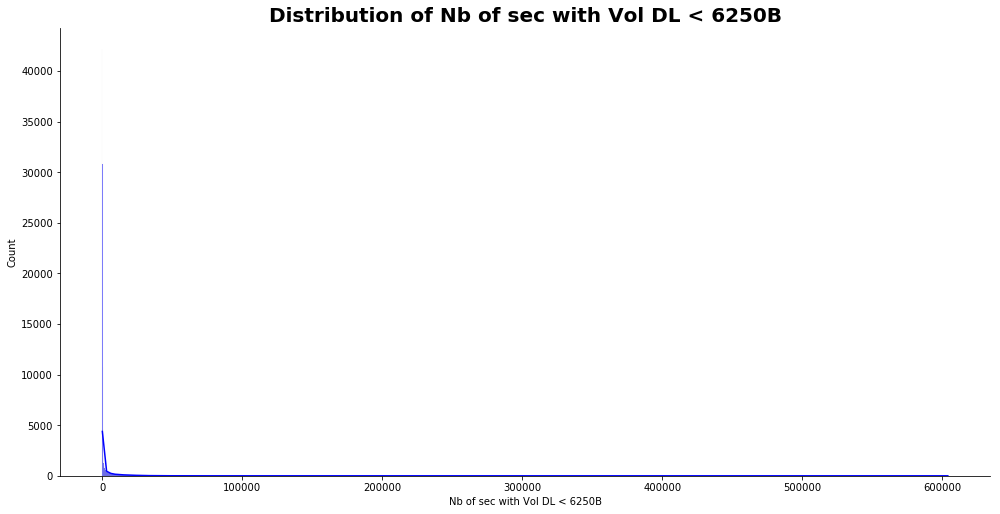

In [383]:
plot_hist(numerical_data, 'Nb of sec with Vol DL < 6250B', "blue")

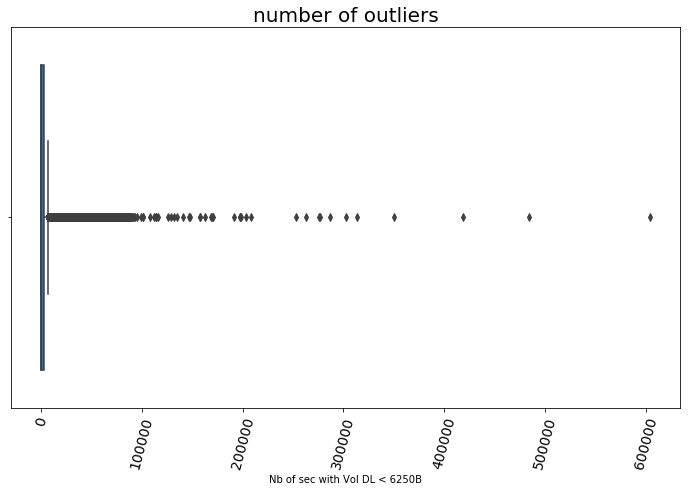

In [384]:
plot_box(numerical_data, 'Nb of sec with Vol DL < 6250B', "number of outliers")

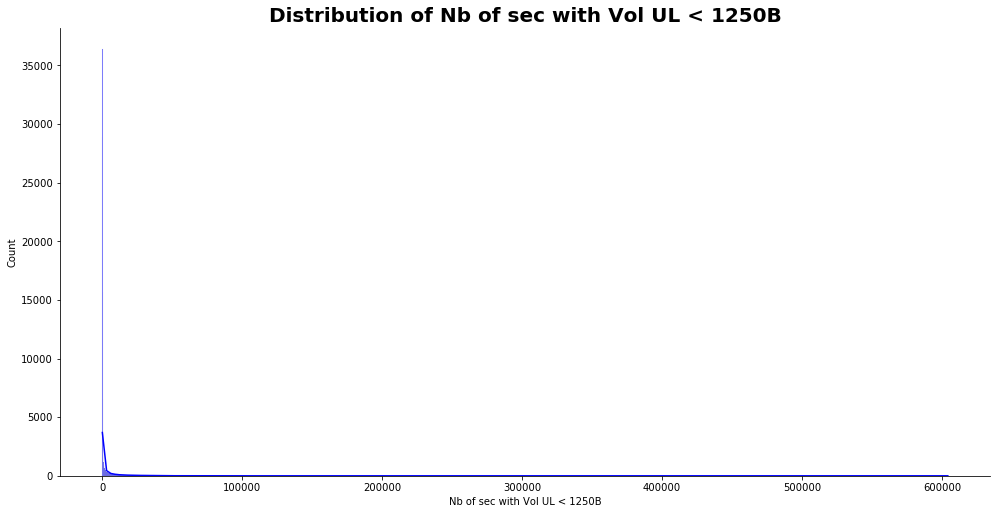

In [385]:
plot_hist(numerical_data,  'Nb of sec with Vol UL < 1250B', "blue")

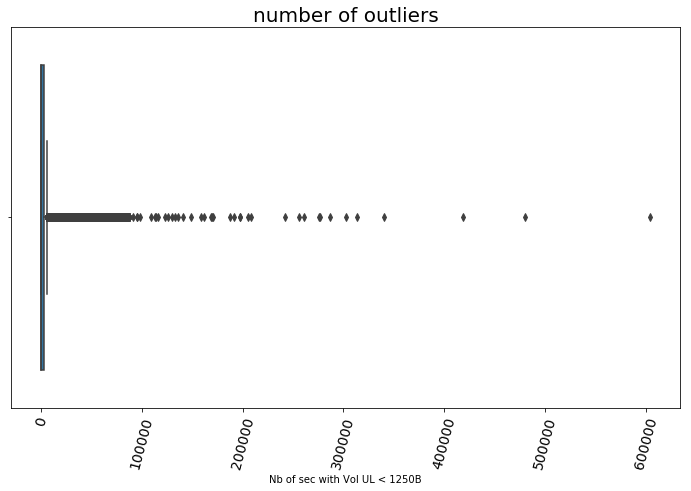

In [386]:
plot_box(numerical_data,  'Nb of sec with Vol UL < 1250B', "number of outliers")

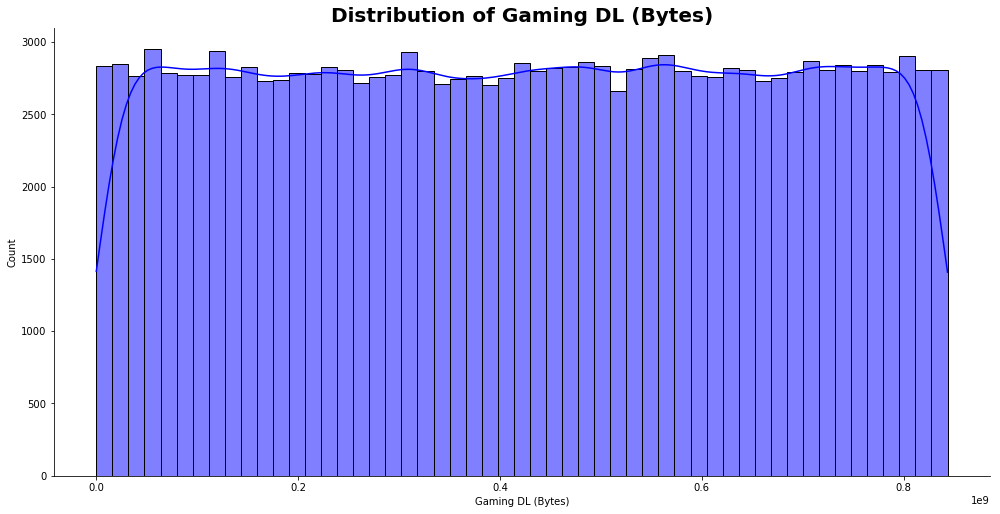

In [387]:
plot_hist(numerical_data,'Gaming DL (Bytes)',"blue")

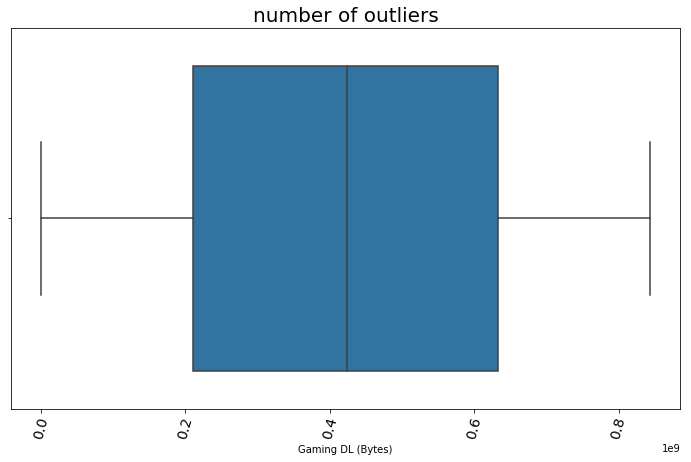

In [388]:
plot_box(numerical_data,'Gaming DL (Bytes)',"number of outliers")

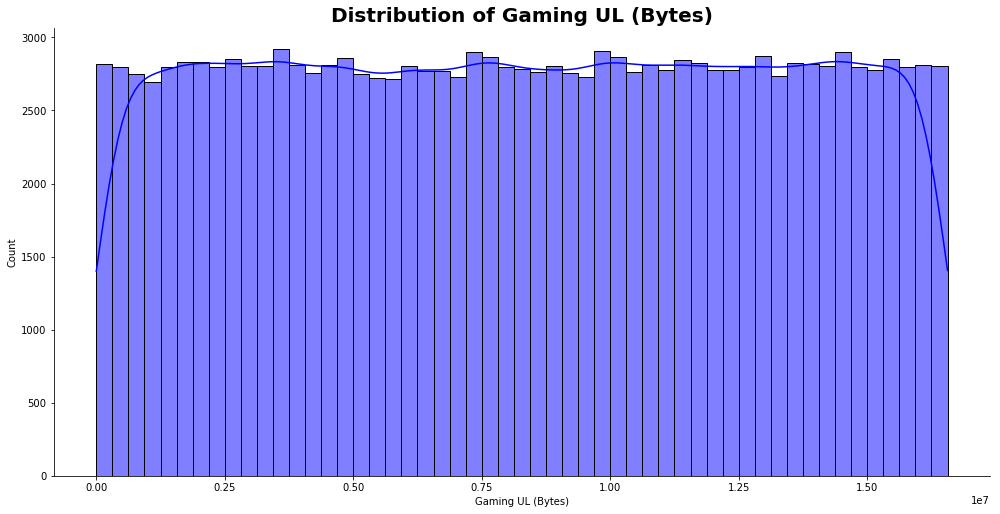

In [389]:
plot_hist(numerical_data, 'Gaming UL (Bytes)',"blue")

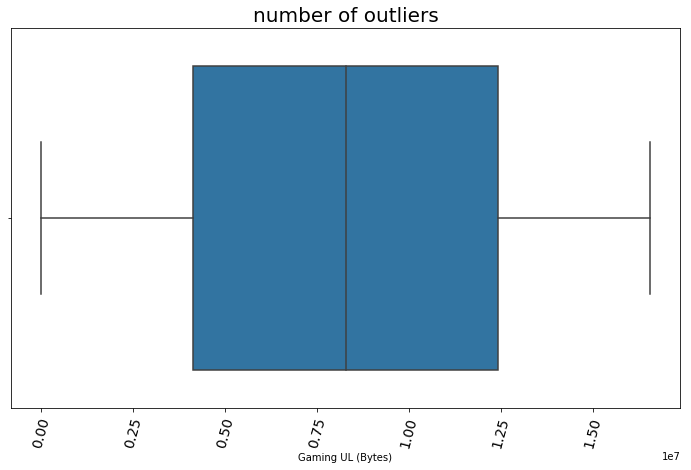

In [390]:
plot_box(numerical_data, 'Gaming UL (Bytes)',"number of outliers")

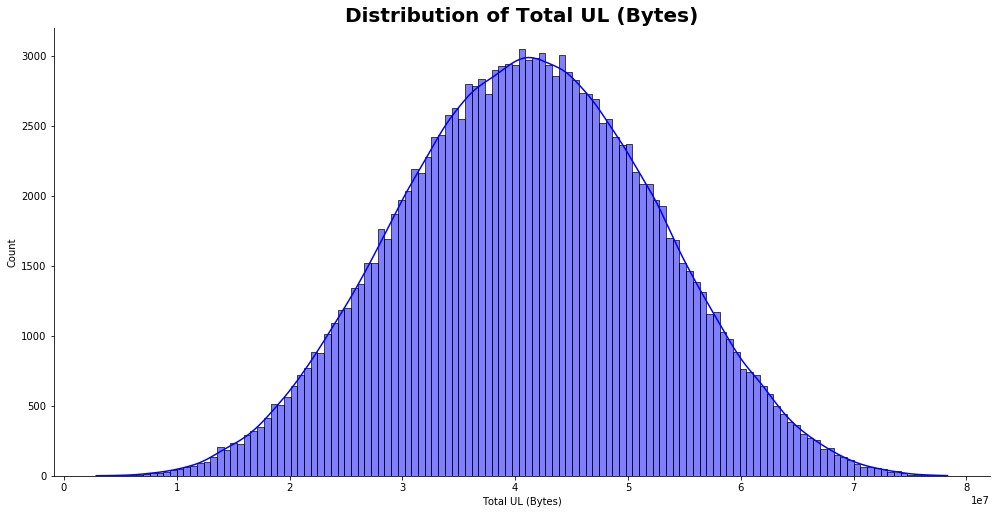

In [391]:
plot_hist(numerical_data, 'Total UL (Bytes)', "blue")

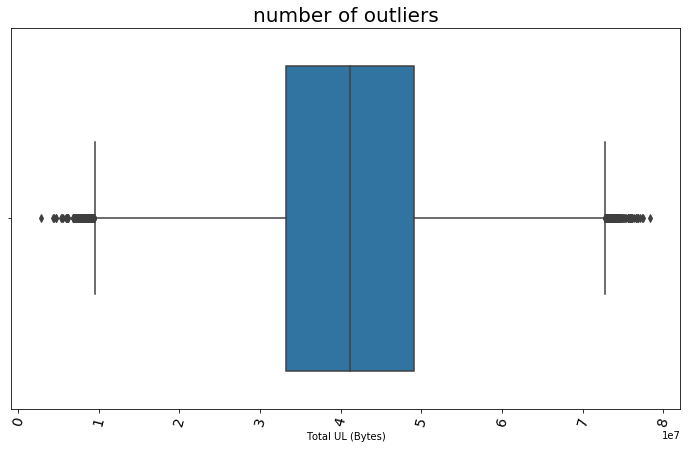

In [392]:
plot_box(numerical_data, 'Total UL (Bytes)', "number of outliers")

### Bivariate Analysis 
– explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings. 


In [393]:
cor_matrixB

,MSISDN/Number,Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Total UL (Bytes),Total DL (Bytes)
MSISDN/Number,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00
Avg Bearer TP UL (kbps),0.00,1.00,0.40,0.31,0.31,0.33,0.23,0.14,0.37,0.11,0.40,0.41,0.00,0.00
DL TP < 50 Kbps (%),0.00,0.40,1.00,0.84,0.87,0.73,0.32,0.11,0.39,0.20,0.35,0.48,0.00,0.00
50 Kbps < DL TP < 250 Kbps (%),0.00,0.31,0.84,1.00,0.63,0.33,0.25,0.09,0.27,0.19,0.24,0.32,0.00,0.00
250 Kbps < DL TP < 1 Mbps (%),0.00,0.31,0.87,0.63,1.00,0.56,0.20,0.08,0.32,0.15,0.29,0.41,0.00,0.00
DL TP > 1 Mbps (%),0.00,0.33,0.73,0.33,0.56,1.00,0.32,0.09,0.35,0.10,0.31,0.43,0.00,0.00
10 Kbps < UL TP < 50 Kbps (%),0.00,0.23,0.32,0.25,0.20,0.32,1.00,0.24,0.29,0.08,0.20,0.17,0.01,0.00
50 Kbps < UL TP < 300 Kbps (%),0.00,0.14,0.11,0.09,0.08,0.09,0.24,1.00,0.21,0.03,0.13,0.07,0.00,0.00
Activity Duration UL (ms),0.00,0.37,0.39,0.27,0.32,0.35,0.29,0.21,1.00,0.07,0.75,0.77,0.00,0.00
Dur. (ms).1,0.02,0.11,0.20,0.19,0.15,0.10,0.08,0.03,0.07,1.00,0.06,0.07,0.00,0.00


In [394]:
upper_tri

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
Bearer Id,nan,0.00,0.00,0.01,0.00,0.00,0.16,0.02,0.03,0.07,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Start ms,nan,nan,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
End ms,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Dur. (ms),nan,nan,nan,nan,0.03,0.02,0.06,0.05,0.02,0.17,...,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00
IMSI,nan,nan,nan,nan,nan,0.66,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01
MSISDN/Number,nan,nan,nan,nan,nan,nan,0.01,0.00,0.00,0.00,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00
IMEI,nan,nan,nan,nan,nan,nan,nan,0.01,0.14,0.30,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Avg RTT DL (ms),nan,nan,nan,nan,nan,nan,nan,nan,0.01,0.00,...,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00
Avg RTT UL (ms),nan,nan,nan,nan,nan,nan,nan,nan,nan,0.07,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Avg Bearer TP DL (kbps),nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00


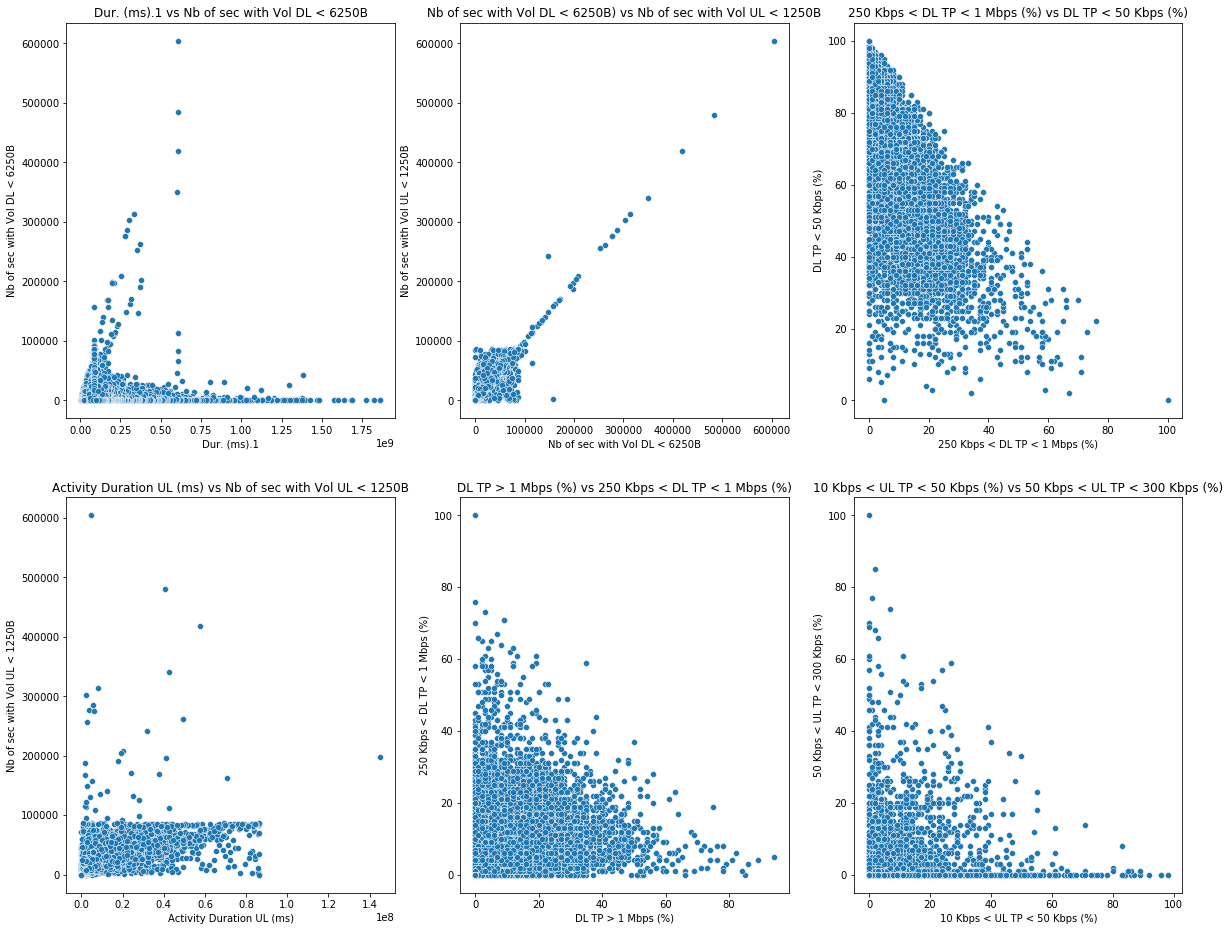

In [395]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1,title="Dur. (ms).1 vs Nb of sec with Vol DL < 6250B")
sns.scatterplot(data=numerical_data,x="Dur. (ms).1",y="Nb of sec with Vol DL < 6250B",hue=None,style=None)

plt.subplot(2,3,2,title="Nb of sec with Vol DL < 6250B) vs Nb of sec with Vol UL < 1250B")
sns.scatterplot(data=numerical_data,x="Nb of sec with Vol DL < 6250B",y="Nb of sec with Vol UL < 1250B",hue=None,style=None)

plt.subplot(2,3,3,title="250 Kbps < DL TP < 1 Mbps (%) vs DL TP < 50 Kbps (%)")
sns.scatterplot(data=numerical_data,x="250 Kbps < DL TP < 1 Mbps (%)",y="DL TP < 50 Kbps (%)",hue=None,style=None)

plt.subplot(2,3,4,title="Activity Duration UL (ms) vs Nb of sec with Vol UL < 1250B")
sns.scatterplot(data=numerical_data,x="Activity Duration UL (ms)",y="Nb of sec with Vol UL < 1250B",hue=None)

plt.subplot(2,3,5,title="DL TP > 1 Mbps (%) vs 250 Kbps < DL TP < 1 Mbps (%)")
sns.scatterplot(data=numerical_data,x="DL TP > 1 Mbps (%)",y="250 Kbps < DL TP < 1 Mbps (%)")

plt.subplot(2,3,6,title="10 Kbps < UL TP < 50 Kbps (%) vs 50 Kbps < UL TP < 300 Kbps (%)")
sns.scatterplot(data=numerical_data,x="10 Kbps < UL TP < 50 Kbps (%)",y="50 Kbps < UL TP < 300 Kbps (%)")

plt.show()

### Variable transformations 
– segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 


In [396]:
numerical_data[['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 
                'Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)', 
                'DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)', 
                '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 
        'Activity Duration DL (ms)','Activity Duration UL (ms)',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 
        'Email DL (Bytes)','Email UL (Bytes)', 
        'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 
        'Gaming DL (Bytes)','Gaming UL (Bytes)', 
        'Other DL (Bytes)', 'Other UL (Bytes)',
       'Total UL (Bytes)', 'Total DL (Bytes)']].shape

(148506, 32)

In [407]:
numerical_data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,"148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00",...,"148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00"
mean,"10,146,757,650,164,756,480.00",499.21,498.64,"105,084.05","208,201,599,922,260.41","41,906,541,782.21","48,500,684,616,792.02",91.65,15.28,"13,287.52",...,"11,633,868.43","11,008,567.70","11,627,241.74","11,001,902.34","422,064,222.70","8,289,599.59","421,152,465.36","8,262,685.05","41,119,372.80","454,664,032.00"
std,"2,893,261,633,271,228,928.00",288.56,288.07,"81,072.74","15,243,472,825.67","2,450,975,846,357.30","22,432,166,298,203.47",530.51,76.63,"23,993.48",...,"6,711,236.45","6,345,625.17","6,724,993.74","6,357,929.85","244,004,290.26","4,781,966.86","243,163,937.39","4,768,806.07","11,278,441.20","244,179,073.24"
min,"6,917,537,518,543,529,984.00",0.00,0.00,"7,142.00","204,047,108,489,451.00","33,601,001,722.00","440,015,202,000.00",0.00,0.00,0.00,...,53.00,105.00,42.00,35.00,"2,516.00",59.00,"3,290.00",148.00,"2,866,892.00","7,114,041.00"
25%,"7,349,883,247,462,785,024.00",250.00,251.00,"58,248.75","208,201,401,264,008.00","33,651,311,444.25","35,460,708,962,514.00",28.00,3.00,43.00,...,"5,833,290.25","5,515,832.00","5,778,898.50","5,476,773.75","210,476,489.00","4,130,680.00","210,304,184.50","4,144,178.75","33,218,278.00","243,126,304.25"
50%,"7,349,883,264,172,940,288.00",499.00,500.00,"86,399.00","208,201,546,332,650.50","33,663,708,556.00","35,722,309,017,450.00",38.00,5.00,63.00,...,"11,615,961.50","11,012,318.00","11,642,380.00","10,999,370.50","423,466,906.50","8,291,649.50","421,861,759.00","8,266,016.00","41,141,959.50","455,940,800.50"
75%,"13,042,425,978,973,900,800.00",749.00,749.00,"132,932.75","208,201,771,619,073.25","33,683,515,176.75","86,119,704,824,101.00",62.00,11.00,"19,699.50",...,"17,446,392.25","16,514,556.25","17,470,916.50","16,502,847.75","633,274,979.00","12,432,259.75","631,633,770.00","12,380,494.00","49,032,524.00","665,754,159.25"
max,"13,186,541,167,134,199,808.00",999.00,999.00,"1,859,336.00","208,252,167,239,575.00","882,397,108,489,451.00","99,001,201,327,774.00","96,923.00","7,120.00","378,160.00",...,"23,259,098.00","22,011,962.00","23,259,189.00","22,011,955.00","843,441,889.00","16,558,794.00","843,442,489.00","16,558,816.00","78,331,311.00","902,969,616.00"


In [397]:

total_data = pd.DataFrame()
total_data['total_avg'] = numerical_data['Avg RTT DL (ms)'] +  numerical_data['Avg RTT UL (ms)']
total_data['total_Avg Bearer'] = numerical_data['Avg Bearer TP DL (kbps)'] +  numerical_data['Avg Bearer TP UL (kbps)']
total_data['total_activity_duration'] = numerical_data['Activity Duration DL (ms)'] +  numerical_data['Activity Duration UL (ms)']
total_data['total_Social_Media'] = numerical_data['Social Media DL (Bytes)'] +  numerical_data['Social Media UL (Bytes)']
total_data['total_Google'] = numerical_data['Google DL (Bytes)'] +  numerical_data['Google UL (Bytes)']
total_data['total_Email'] = numerical_data['Email DL (Bytes)'] +  numerical_data['Email UL (Bytes)']
total_data['total_Youtube'] = numerical_data['Youtube DL (Bytes)'] +  numerical_data['Youtube UL (Bytes)']
total_data['total_Netflix'] = numerical_data['Netflix DL (Bytes)'] +  numerical_data['Netflix UL (Bytes)']
total_data['total_Gaming'] = numerical_data['Gaming DL (Bytes)'] +  numerical_data['Gaming UL (Bytes)']
total_data['total_Other'] = numerical_data['Other DL (Bytes)'] +  numerical_data['Other UL (Bytes)']
total_data['total_Bytes'] = numerical_data['Total UL (Bytes)'] +  numerical_data['Total DL (Bytes)']

In [398]:
total_data

,total_avg,total_Avg Bearer,total_activity_duration,total_Social_Media,total_Google,total_Email,total_Youtube,total_Netflix,total_Gaming,total_Other,total_Bytes
0,47.00,67.00,"76,411.00","1,570,185.00","2,905,912.00","3,701,304.00","18,355,943.00","17,855,187.00","292,426,453.00","180,558,843.00","345,629,377.00"
1,70.00,42.00,"3,728.00","1,933,278.00","4,414,096.00","937,385.00","39,359,124.00","35,565,545.00","609,920,783.00","541,959,383.00","707,185,356.00"
2,33.00,15.00,0.00,"1,726,277.00","10,229,119.00","3,363,124.00","34,425,237.00","23,751,202.00","229,980,251.00","414,908,351.00","307,690,973.00"
3,33.00,88.00,"41,212.00","657,493.00","11,811,761.00","2,070,983.00","36,534,765.00","15,092,588.00","810,387,875.00","761,837,216.00","889,352,748.00"
4,33.00,15.00,0.00,"912,788.00","7,748,843.00","2,110,349.00","34,222,253.00","17,539,799.00","531,237,049.00","564,619,822.00","607,681,403.00"
...,...,...,...,...,...,...,...,...,...,...,...
149995,322.00,"64,813.00","5,736,111.00","993,175.00","1,265,634.00","4,280,107.00","24,553,645.00","29,618,711.00","797,160,102.00","336,273,648.00","872,761,860.00"
149996,32.00,117.00,"84,291.00","3,517,065.00","12,784,914.00","690,876.00","27,955,095.00","37,561,864.00","535,806,880.00","16,751,926.00","631,804,110.00"
149997,29.00,77.00,"34,023.00","2,352,181.00","4,415,361.00","2,121,718.00","22,165,518.00","40,643,294.00","631,628,095.00","714,638,145.00","705,783,925.00"
149998,49.00,90.00,"53,643.00","1,260,239.00","6,585,469.00","2,058,277.00","24,516,413.00","15,029,702.00","566,933,800.00","132,415,585.00","627,698,629.00"


### Correlation Analysis 
– compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data 


In [399]:
total_data.columns

Index(['total_avg', 'total_Avg Bearer', 'total_activity_duration',
       'total_Social_Media', 'total_Google', 'total_Email', 'total_Youtube',
       'total_Netflix', 'total_Gaming', 'total_Other', 'total_Bytes'],
      dtype='object')

In [400]:
apps = total_data[['total_Social_Media', 'total_Google', 'total_Email', 'total_Youtube',
       'total_Netflix', 'total_Gaming', 'total_Other']]

In [401]:
import plotly.express as px
fig = px.imshow(apps.corr())
fig.show()

In [408]:
apps.corr()

,total_Social_Media,total_Google,total_Email,total_Youtube,total_Netflix,total_Gaming,total_Other
total_Social_Media,1.00,-0.00,0.00,0.00,0.00,0.00,0.01
total_Google,-0.00,1.00,-0.00,0.00,-0.00,-0.00,-0.00
total_Email,0.00,-0.00,1.00,-0.00,0.00,-0.00,-0.00
total_Youtube,0.00,0.00,-0.00,1.00,0.00,-0.00,0.00
total_Netflix,0.00,-0.00,0.00,0.00,1.00,-0.00,-0.01
total_Gaming,0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.00
total_Other,0.01,-0.00,-0.00,0.00,-0.01,-0.00,1.00


### Dimensionality Reduction 
– perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points-maximum). 

In [413]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(numerical_data)
PCA(n_components=10)


PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

# User Engagement analysis